### A linked list is a data structure that is similar to an array. It also stores data in an ordered manner, but it is implemented using node objects (you will have a custom class that defines the node object). Each node will have a "next" pointer, which points to the node representing the next element in the sequence.

> A node can be thought of as an element, but with more information than just one piece of data like an integer or string.

> Almost all the problems that involve linked lists will have the linked list as part of the input, so there isn't a decision on if you should use it, you're forced to

In [ ]:
class ListNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next
    
one = ListNode(1)
two = ListNode(2)
three = ListNode(3)
one.next = two
two.next = three
head = one

print(head.val)
print(head.next.val)
print(head.next.next.val)

## Advantages and Disadvantages Compared to Arrays:

### The main advantage of a linked list is that you can add and remove elements at any position in O(1). The caveat is that you need to have a reference to a node at the position in which you want to perform the addition/removal, otherwise the operation is O(n), because you will need to iterate starting from the head until you get to the desired position. However, this is still much better than a normal (dynamic) array, which requires O(n) for adding and removing from an arbitrary position. Also, linked lists have the advantage of not having fixed sizes. While dynamic arrays can be resized, under the hood they still are allocated a fixed size - it's just that when this size is exceeded, the array is resized, which is expensive. Linked lists don't suffer from this. However, linked lists have more overhead than arrays - every element needs to have extra storage for the pointers. If you are only storing small items like booleans or characters, then you may be more than doubling the space needed.


### The main disadvantage of a linked list is that there is no random access. If you have a large linked list and want to access the 150,000th element, then there usually isn't a better way than to start at the head and iterate 150,000 times. So while an array has O(1) indexing, a linked list could require O(n) to access an element at a given position.

## Assignments (=)




In [ ]:
ptr = head
head = head.next
head = None

#### After these lines of code, ptr still refers to the original head node, even though the head variable changed. This is the first important concept: variables remain at nodes unless they are modified directly (ptr = something is the only way to modify ptr).

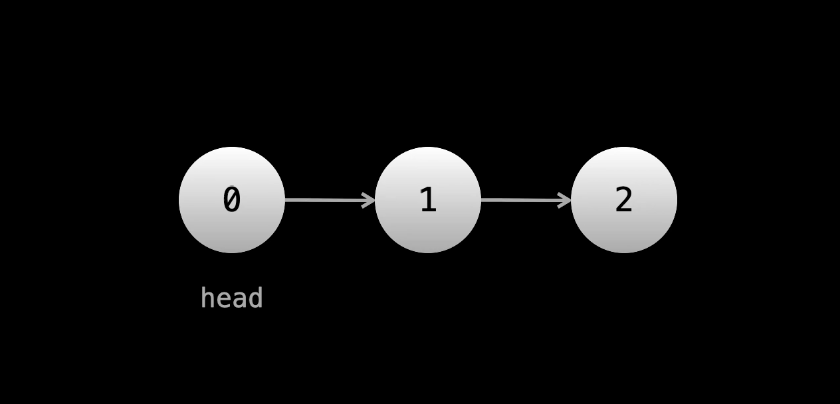

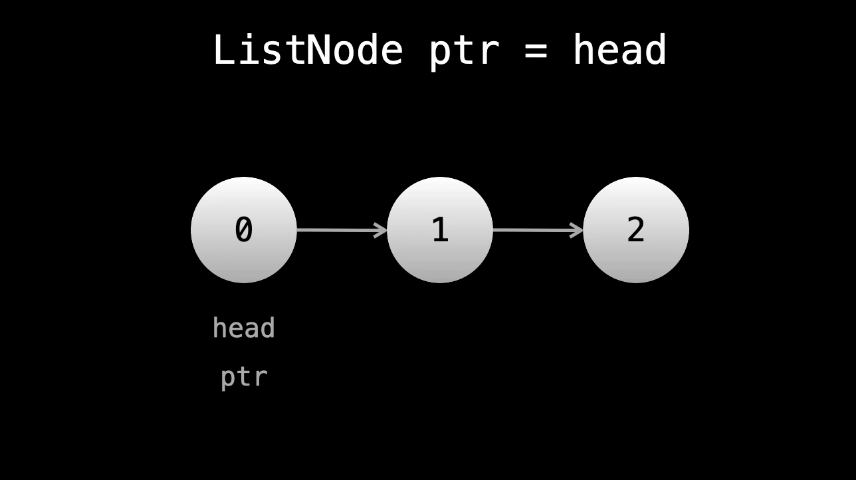

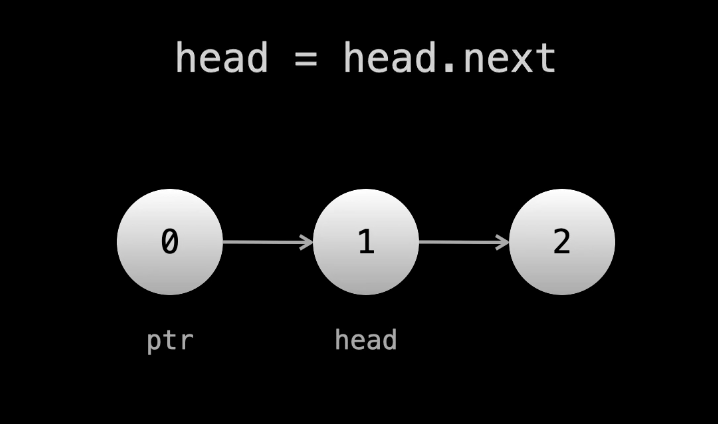

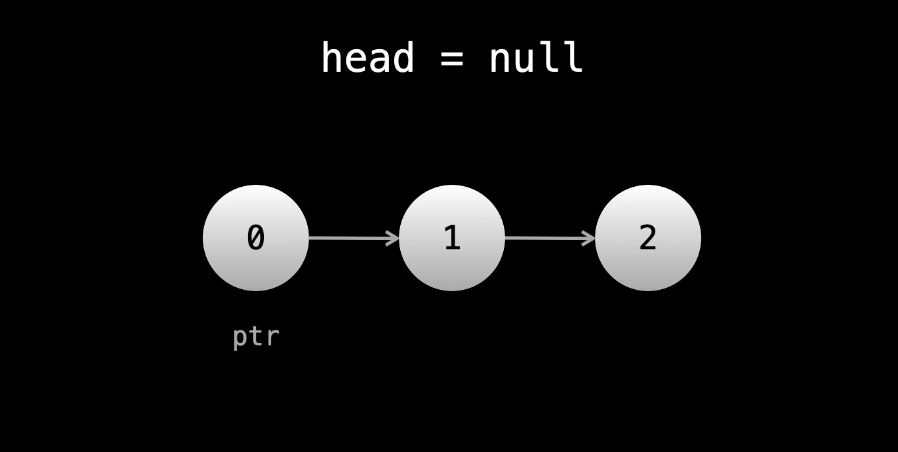

## Traversal:
#### Iterating forward through a linked list can be done with a simple loop. This is the usual code that you will use to do so: as an example let's get the sum of all values from an integer linked list:

In [1]:
def get_sum(head):
    ans = 0
    while head:
        ans += head.val
        head = head.next
    
    return ans

## Types of Linked Lists:
### Singly Linked List: This is the most common type of linked list and the one that is given in the code above. In a singly linked list, each node only has a pointer to the next node. This means you can only move forward in the list when iterating. The pointer used to reference the next node is usually called next.
> Let's say you want to add an element to a linked list so that it becomes the element at position i

In [2]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def add_node(prev_node, node_to_add):
    node_to_add.next = prev_node.next
    prev_node.next = node_to_add

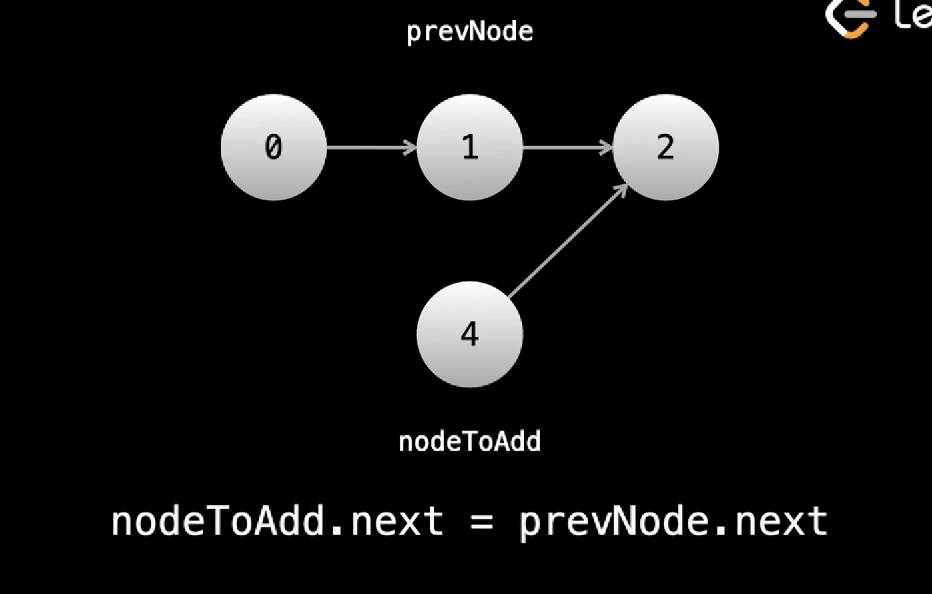

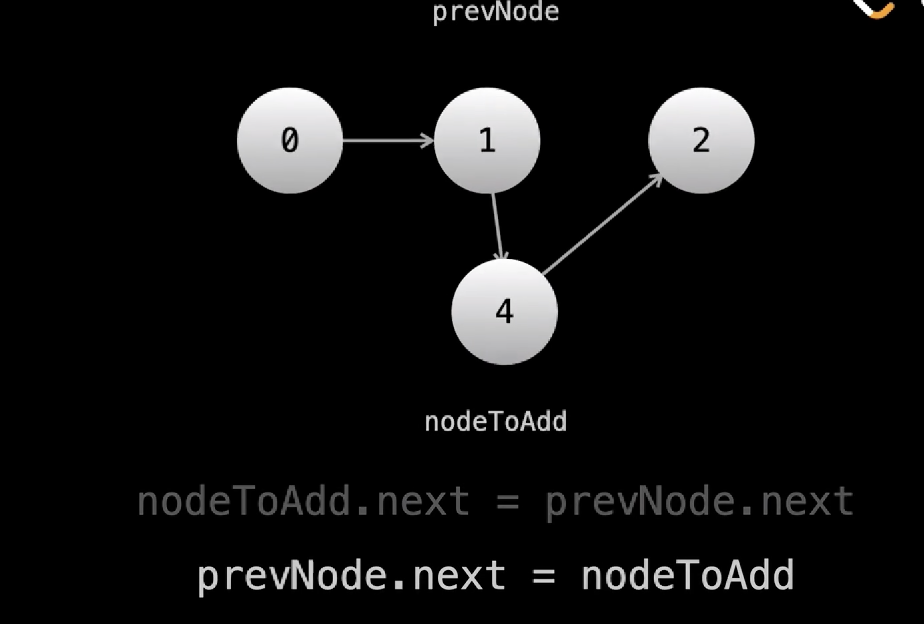


> Let's say you want to delete the element at position i

In [3]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

# Let prev_node be the node at position i - 1
def delete_node(prev_node):
    prev_node.next = prev_node.next.next

### Doubly Linked Lists: A doubly linked list is like a singly linked list, but each node also contains a pointer to the previous node. This pointer is usually called prev, and it allows iteration in both directions.

> #### In a singly linked list, we needed a reference to the node at i - 1 if we wanted to add or remove at i. This is because we needed to perform operations on the prevNode. With a doubly linked list, we only need a reference to the node at i. This is because we can simply reference the prev pointer of that node to get the node at i - 1, and then do the exact same operations as above. With a doubly linked list, we need to do extra work to also update the prev pointers.

In [4]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

# Let node be the node at position i
def add_node(node, node_to_add):
    prev_node = node.prev
    node_to_add.next = node
    node_to_add.prev = prev_node
    prev_node.next = node_to_add
    node.prev = node_to_add

# Let node be the node at position i
def delete_node(node):
    prev_node = node.prev
    next_node = node.next
    prev_node.next = next_node
    next_node.prev = prev_node

> #### We call the start of a linked list the head and the end of a linked list the tail.

### Linked lists with sentinel nodes: Sentinel nodes sit at the start and end of linked lists and are used to make operations and the code needed to execute those operations cleaner. The previous code we looked at is prone to errors. For example, if we are trying to delete the last node in the list, then nextNode will be null, and trying to access nextNode.next would result in an error. With sentinel nodes, we don't need to worry about this scenario because the last node's next points to the sentinel tail.



In [5]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

def add_to_end(node_to_add):
    node_to_add.next = tail
    node_to_add.prev = tail.prev
    tail.prev.next = node_to_add
    tail.prev = node_to_add

def remove_from_end():
    if head.next == tail:
        return

    node_to_remove = tail.prev
    node_to_remove.prev.next = tail
    tail.prev = node_to_remove.prev

def add_to_start(node_to_add):
    node_to_add.prev = head
    node_to_add.next = head.next
    head.next.prev = node_to_add
    head.next = node_to_add

def remove_from_start():
    if head.next == tail:
        return
    
    node_to_remove = head.next
    node_to_remove.next.prev = head
    head.next = node_to_remove.next

head = ListNode(None)
tail = ListNode(None)
head.next = tail
tail.prev = head

### Dummy Pointers: As mentioned earlier, we usually want to keep a reference to the head to ensure we can always access any element. Sometimes, it's better to traverse using a "dummy" pointer and to keep head at the head. It  allows us to traverse the linked list without losing a reference to the head.

In [6]:
def get_sum(head):
    ans = 0
    dummy = head
    while dummy:
        ans += dummy.val
        dummy = dummy.next
    
    # same as before, but we still have a pointer at the head
    return ans